In [28]:
import pandas as pd
from pandas_datareader import data as wb
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
ticker='PG'
sec_prices=pd.DataFrame()
sec_prices[ticker]=wb.DataReader(ticker,data_source='yahoo',start='2007-1-1')['Adj Close']
sec_prices

,PG
Date,
2007-01-03,42.380424
2007-01-04,42.058666
2007-01-05,41.697510
2007-01-08,41.789440
2007-01-09,41.684357
...,...
2021-04-12,136.919998
2021-04-13,135.110001
2021-04-14,135.600006


In [30]:
sec_returns=np.log(1+sec_prices.pct_change())
sec_returns

,PG
Date,
2007-01-03,NaN
2007-01-04,-0.007621
2007-01-05,-0.008624
2007-01-08,0.002202
2007-01-09,-0.002518
...,...
2021-04-12,0.004025
2021-04-13,-0.013308
2021-04-14,0.003620


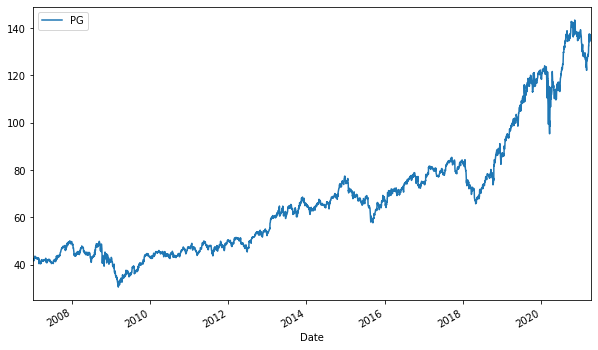

In [31]:
sec_prices.plot(figsize=(10,6));

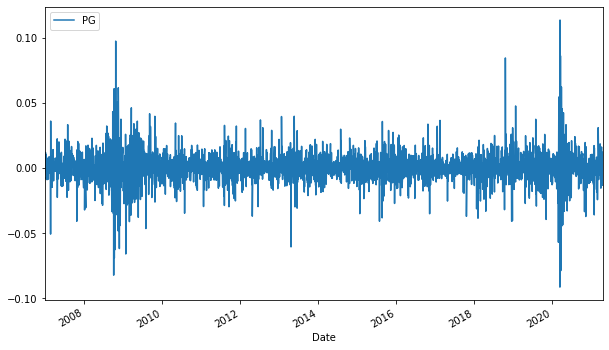

In [32]:
sec_returns.plot(figsize=(10,6));

In [33]:
u=sec_returns.mean()
u

PG    0.000327
dtype: float64

In [34]:
variance=sec_returns.var()
variance

PG    0.000141
dtype: float64

**Drift**
### $$
drifts=u-\frac{1}{2}\cdot variance
$$

In [35]:
drifts=u-(1/2)*variance
drifts

PG    0.000257
dtype: float64

In [36]:
stdev=sec_returns.std()
stdev

PG    0.011854
dtype: float64

******
******

In [37]:
type(drifts)

pandas.core.series.Series

In [38]:
type(stdev)

pandas.core.series.Series

In [39]:
np.array(drifts)

array([0.00025653])

In [40]:
drifts.values

array([0.00025653])

In [41]:
stdev.values

array([0.01185387])

In [42]:
norm.ppf(0.95)

1.6448536269514722

In [47]:
x=np.random.rand(10,2)
x

array([[0.20334016, 0.91160779],
       [0.9334285 , 0.1751159 ],
       [0.30570464, 0.52288256],
       [0.34156554, 0.04311968],
       [0.25887987, 0.81034788],
       [0.711218  , 0.70019865],
       [0.07328721, 0.92512101],
       [0.21885149, 0.69630323],
       [0.50051934, 0.74581249],
       [0.7731775 , 0.68832979]])

In [48]:
norm.ppf(x)

array([[-8.29749706e-01,  1.35072225e+00],
       [ 1.50182237e+00, -9.34139764e-01],
       [-5.08062828e-01,  5.73895713e-02],
       [-4.08194223e-01, -1.71557776e+00],
       [-6.46802541e-01,  8.79178980e-01],
       [ 5.56946489e-01,  5.24971938e-01],
       [-1.45173820e+00,  1.44038684e+00],
       [-7.76077911e-01,  5.13797552e-01],
       [ 1.30178186e-03,  6.61370056e-01],
       [ 7.49352135e-01,  4.91121625e-01]])

In [50]:
z=norm.ppf(np.random.rand(10,2))
z

array([[-0.40048067, -0.50503319],
       [-1.84154311,  0.77317586],
       [ 0.59080318,  1.00022725],
       [-0.03638968, -1.76287112],
       [-1.43781845,  0.14459612],
       [ 0.50828299, -1.29134393],
       [-1.53307246, -0.32040104],
       [ 1.25550266, -0.75542623],
       [-0.11786881, -0.03611878],
       [-0.05411855, -0.30611423]])

In [49]:
t_intervals=1000
iterations=10

**Daily_return**
### $$
daily\_return=e^{r}
$$
$$
r = drifts + stdev\cdot z
$$

In [70]:
predict_daily_returns=np.exp(drifts.values+stdev.values*norm.ppf(np.random.rand(t_intervals,iterations)))
predict_daily_returns

array([[1.01492672, 0.99421257, 1.01424174, ..., 1.00020243, 1.00802674,
        1.01071235],
       [0.99457385, 0.98153705, 0.99502326, ..., 1.01025909, 1.00511786,
        0.99717352],
       [0.98709038, 1.01304726, 1.00378181, ..., 1.01057501, 0.99613481,
        1.00452308],
       ...,
       [0.99073673, 1.01136258, 1.02286678, ..., 1.00483763, 1.00145574,
        1.01709015],
       [1.01994918, 0.99010955, 0.99772593, ..., 1.01363137, 1.00948451,
        0.99162745],
       [0.98051138, 1.00916574, 1.01064288, ..., 1.00429225, 0.99886044,
        1.00191228]])

******
******

$$
S_t=S_0\cdot daily\_return_t
$$
$$
S_{t+1} = S_t\cdot daily\_return_{t+1}
$$
$$
...
$$
$$
S_{t+999}=S_{t+998}\cdot daily\_return_{t+999}
$$

In [71]:
S0=sec_prices.iloc[-1]
S0

PG    137.25
Name: 2021-04-16 00:00:00, dtype: float64

In [72]:
predict_prices=np.zeros_like(predict_daily_returns)
predict_prices

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [73]:
len(predict_prices[0])

10

In [74]:
len(predict_daily_returns)

1000

In [75]:
predict_prices[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [76]:
predict_prices[0]=S0

In [77]:
predict_prices

array([[137.25, 137.25, 137.25, ..., 137.25, 137.25, 137.25],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ]])

In [78]:
for t in range(1,t_intervals):
    predict_prices[t] = predict_prices[t-1]*predict_daily_returns[t]

In [79]:
predict_prices

array([[137.25      , 137.25      , 137.25      , ..., 137.25      ,
        137.25      , 137.25      ],
       [136.50526124, 134.71596043, 136.56694296, ..., 138.65806055,
        137.95242682, 136.86206568],
       [134.74303046, 136.47363424, 137.08341356, ..., 140.12437113,
        137.41921484, 137.48110374],
       ...,
       [ 87.20509819, 164.97709325, 228.16081705, ..., 176.10768857,
        276.72405065, 131.20432356],
       [ 88.94476838, 163.34539571, 227.64196447, ..., 178.50827768,
        279.34864187, 130.10580888],
       [ 87.21135774, 164.84257693, 230.06472974, ..., 179.27447997,
        279.03030626, 130.35460698]])

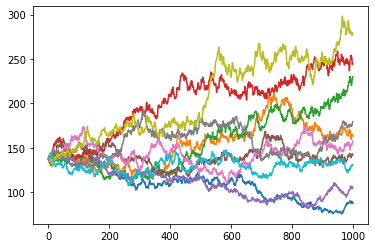

In [80]:
plt.figsize=(10,6)
plt.plot(predict_prices);